Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
First label: 5


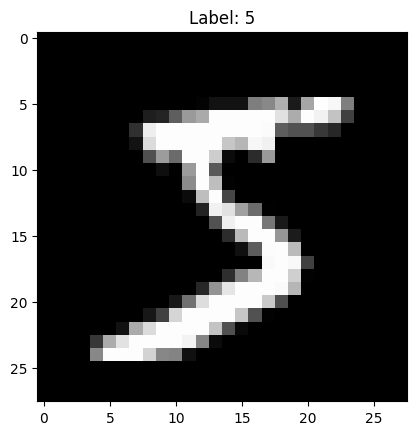

In [69]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape
print("Training data shape:", x_train.shape)   # (60000, 28, 28)
print("Test data shape:", x_test.shape)       # (10000, 28, 28)
print("First label:", y_train[0])

# Visualize an image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


🧹 1. Normalize the pixel values

MNIST pixels range from 0–255. We scale them to [0, 1] to help the neural network learn faster.

In [70]:
# Normalize the images to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0


🏷️ 3. One-hot encode the labels


The labels (digits) need to be converted from single numbers like 7 into vectors like [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].

In [71]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
print(y_train)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train)

[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


✅ Step 3: Build the Neural Network Model

We’ll use Keras (TensorFlow) to define a simple neural network:


🧠 Network Architecture:

Input: 784 units (28×28 pixels, flattened)

Hidden Layer: 128 units, ReLU activation

Output Layer: 10 units (one for each digit), Softmax activation



In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28) ),       # Flattens 28x28 into 784
    Dense(128, activation='relu' ),       # Hidden layer
    #  Dense(128, activation='relu' ),       # Hidden layer
    Dense(10, activation='softmax' )      # Output layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
# Check the model summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

✅ Step 4: Compile & Train the Model

Before training, we need to::

1 . Compile the Model

We define:

Loss Function: categorical_crossentropy (used for multi-class classification)

Optimizer: adam (adaptive learning rate)

Metric: accuracy

In [73]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


 Train the Model

Now we train the model with the training data.

In [74]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1,  # use 10% of training data for validation
    verbose=2
)


Epoch 1/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9188 - loss: 0.2802 - val_accuracy: 0.9670 - val_loss: 0.1203
Epoch 2/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9637 - loss: 0.1229 - val_accuracy: 0.9752 - val_loss: 0.0884
Epoch 3/5
1688/1688 - 5s - 3ms/step - accuracy: 0.9748 - loss: 0.0836 - val_accuracy: 0.9747 - val_loss: 0.0844
Epoch 4/5
1688/1688 - 11s - 6ms/step - accuracy: 0.9812 - loss: 0.0634 - val_accuracy: 0.9767 - val_loss: 0.0808
Epoch 5/5
1688/1688 - 6s - 3ms/step - accuracy: 0.9855 - loss: 0.0487 - val_accuracy: 0.9795 - val_loss: 0.0759


In [36]:
# See every attribute / method on the object
print(history.history['loss'])


[2.2785465717315674, 2.259441375732422, 2.233412981033325, 2.2025184631347656, 2.1673007011413574, 2.129730224609375, 2.091032028198242, 2.052525281906128, 2.01450777053833, 1.976678490638733]


Learning Curve

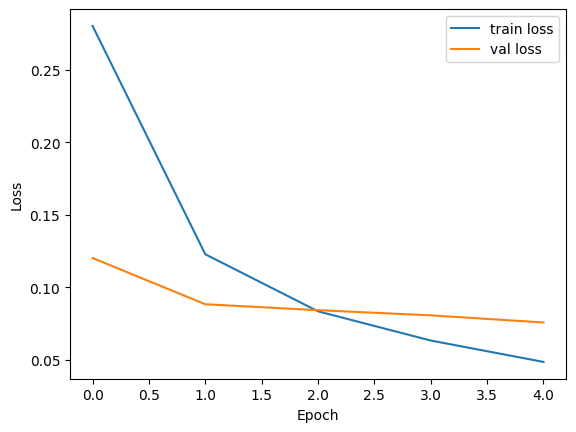

In [75]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


✅ Step 5: Evaluate the Model on Test Set

After training, we use the test data (10,000 examples) to check the final model performance.

In [76]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9769 - loss: 0.0744

Test Accuracy: 0.9769
Test Loss: 0.0744


✅ Bonus: Predict & Visualize

Let's make predictions on test data and visualize some results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


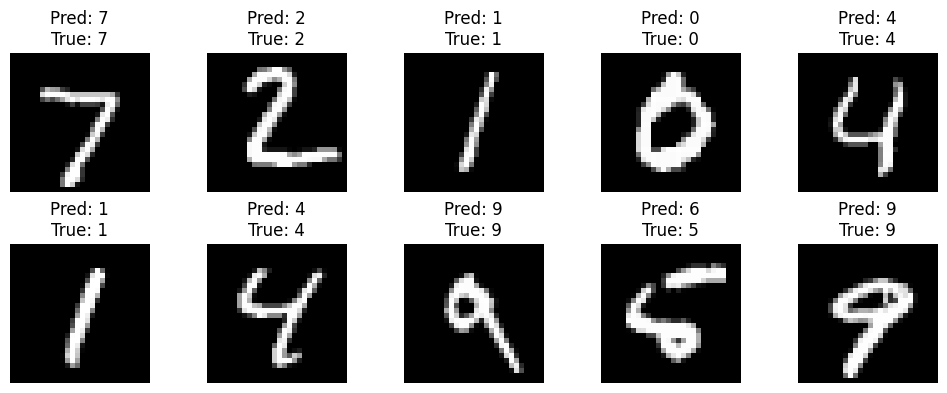

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities
predictions = model.predict(x_test)

# Get class predictions (0-9)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Plot a few test images with predicted labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


✅ Step 6: Plot Training and Validation Curves

We’ll plot:

Loss over epochs

Accuracy over epochs

These are stored in the history.history dictionary from model training.

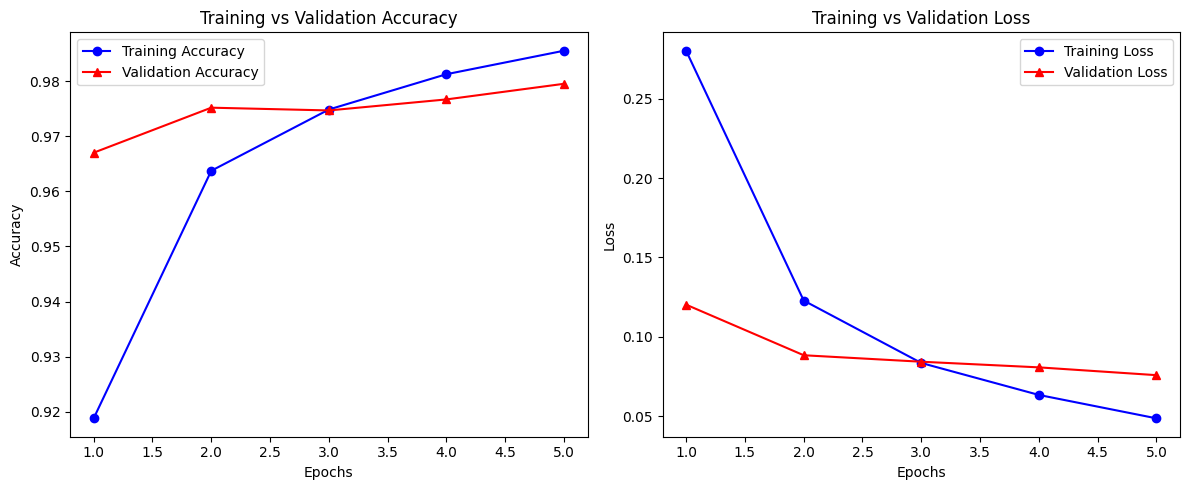

In [78]:
import matplotlib.pyplot as plt

# Extract data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


✅ Step 7: Confusion Matrix

A confusion matrix helps you understand where your model is making mistakes — which digits it confuses most often.

In [79]:
import numpy as np

# Get predicted and true labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Save the model

In [84]:
model.save("my_model.h5")


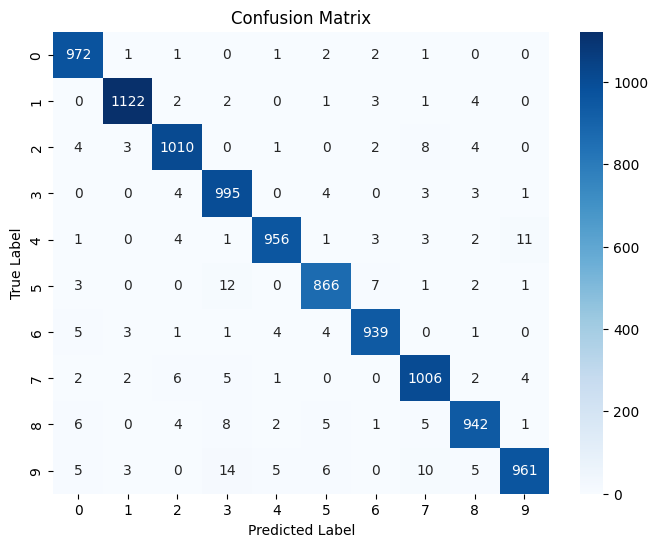

In [80]:
# Plot confusion matrix (with Seaborn for better visuals)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig("confusion_matrix.png")  # Saves to current working directory
plt.show()


In [83]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained model (replace with your model if not saved)
# model = load_model('your_model.h5')  # Optional if you've saved it
# If you already have the model in memory, skip this step

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Define a region of interest (ROI) to draw
    x, y, w, h = 200, 100, 200, 200
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Extract ROI from frame
    roi = frame[y:y+h, x:x+w]
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_resized = cv2.resize(roi_gray, (28, 28))

    # Invert and normalize
    roi_inverted = 255 - roi_resized
    roi_normalized = roi_inverted / 255.0

    # Predict
    input_img = roi_normalized.reshape(1, 28, 28)
    pred = model.predict(input_img)
    digit = np.argmax(pred)

    # Display prediction
    cv2.putText(frame, f"Prediction: {digit}", (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 2)

    # Show the frame
    cv2.imshow("Digit Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
